In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../data/preprocessed_2025.csv")

df.head()


C:\Users\hp\AppData\Local\Temp\ipykernel_6900\2229932312.py:4: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/preprocessed_2025.csv")


,_id,INCIDENT_NUMBER,Initial_CAD_Event_Type,Initial_CAD_Event_Call_Type,Final_Incident_Type,Event_Alarm_Level,Call_Source,Incident_Station_Area,Incident_Ward,Ward_At_Event_Dispatch,...,TFS_Alarm_Time,TFS_Arrival_Time,Last_TFS_Unit_Clear_Time,Persons_Rescued,geometry,incident_datetime,year,month,hour,day_of_week
0,1,F23046527,Medical,Medical,34 - Human - Perceived Emergency,0,03 - From Ambulance,345,9,NaN,...,2023-04-10T18:36:49,2023-04-10T18:40:18,2023-04-10T18:59:09,0.0,"{""type"": ""Point"", ""coordinates"": [0.0, 0.0]}",2023-04-10 18:36:49,2023,4,18,0
1,2,F23048784,Medical,Medical,Medical,0,03 - From Ambulance,443,2,NaN,...,2023-04-14T20:46:32,2023-04-14T20:52:01,2023-04-14T21:06:45,0.0,"{""type"": ""Point"", ""coordinates"": [0.0, 0.0]}",2023-04-14 20:46:32,2023,4,20,4
2,3,F23042208,FIHR - Fire - Highrise Residential,Emergency Fire,01 - Fire,0,01 - 911,115,17,NaN,...,2023-04-01T17:31:49,2023-04-01T17:35:40,2023-04-01T18:33:45,0.0,"{""type"": ""Point"", ""coordinates"": [-79.3431, 43...",2023-04-01 17:31:49,2023,4,17,5
3,4,F23103667,Medical,Medical,Medical,0,03 - From Ambulance,332,10,NaN,...,2023-07-23T12:10:40,2023-07-23T12:15:15,2023-07-23T12:20:27,0.0,"{""type"": ""Point"", ""coordinates"": [0.0, 0.0]}",2023-07-23 12:10:40,2023,7,12,6
4,5,F23178577,Medical,Medical,Medical,0,03 - From Ambulance,312,11,NaN,...,2023-12-02T19:14:19,2023-12-02T19:19:22,2023-12-02T19:22:35,0.0,"{""type"": ""Point"", ""coordinates"": [0.0, 0.0]}",2023-12-02 19:14:19,2023,12,19,5


In [2]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361717 entries, 0 to 361716
Data columns (total 21 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   _id                          361717 non-null  int64  
 1   INCIDENT_NUMBER              361717 non-null  object 
 2   Initial_CAD_Event_Type       361717 non-null  object 
 3   Initial_CAD_Event_Call_Type  361717 non-null  object 
 4   Final_Incident_Type          361694 non-null  object 
 5   Event_Alarm_Level            361717 non-null  int64  
 6   Call_Source                  361693 non-null  object 
 7   Incident_Station_Area        361717 non-null  object 
 8   Incident_Ward                361717 non-null  int64  
 9   Ward_At_Event_Dispatch       0 non-null       float64
 10  Intersection                 361716 non-null  object 
 11  TFS_Alarm_Time               361717 non-null  object 
 12  TFS_Arrival_Time             349248 non-null  object 
 13 

,_id,Event_Alarm_Level,Incident_Ward,Ward_At_Event_Dispatch,Persons_Rescued,year,month,hour,day_of_week
count,361717.000000,361717.000000,361717.000000,0.0,361679.000000,361717.000000,361717.000000,361717.000000,361717.000000
mean,180859.000000,0.003893,12.071246,NaN,0.043691,2023.488990,6.659773,12.987623,3.007122
std,104418.847998,0.086053,6.674725,NaN,2.675558,0.499879,3.404578,6.423195,1.992083
min,1.000000,0.000000,0.000000,NaN,0.000000,2023.000000,1.000000,0.000000,0.000000
25%,90430.000000,0.000000,7.000000,NaN,0.000000,2023.000000,4.000000,9.000000,1.000000
50%,180859.000000,0.000000,12.000000,NaN,0.000000,2023.000000,7.000000,14.000000,3.000000
75%,271288.000000,0.000000,17.000000,NaN,0.000000,2024.000000,10.000000,18.000000,5.000000
max,361717.000000,6.000000,25.000000,NaN,876.000000,2024.000000,12.000000,23.000000,6.000000


In [3]:
df = df.drop(columns=["Ward_At_Event_Dispatch"])

In [4]:
time_cols = [
    "TFS_Alarm_Time",
    "TFS_Arrival_Time",
    "Last_TFS_Unit_Clear_Time",
    "incident_datetime"
]

for col in time_cols:
    df[col] = pd.to_datetime(df[col], errors="coerce")




In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361717 entries, 0 to 361716
Data columns (total 20 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   _id                          361717 non-null  int64         
 1   INCIDENT_NUMBER              361717 non-null  object        
 2   Initial_CAD_Event_Type       361717 non-null  object        
 3   Initial_CAD_Event_Call_Type  361717 non-null  object        
 4   Final_Incident_Type          361694 non-null  object        
 5   Event_Alarm_Level            361717 non-null  int64         
 6   Call_Source                  361693 non-null  object        
 7   Incident_Station_Area        361717 non-null  object        
 8   Incident_Ward                361717 non-null  int64         
 9   Intersection                 361716 non-null  object        
 10  TFS_Alarm_Time               361717 non-null  datetime64[ns]
 11  TFS_Arrival_Time          

In [6]:
df["response_time_minutes"] = (
    df["TFS_Arrival_Time"] - df["TFS_Alarm_Time"]
).dt.total_seconds() / 60


In [7]:
df["response_time_minutes"].describe()



count    349248.000000
mean          5.332171
std           2.271796
min         -55.550000
25%           4.083333
50%           5.100000
75%           6.283333
max         113.566667
Name: response_time_minutes, dtype: float64

In [8]:
df["Persons_Rescued"] = df["Persons_Rescued"].fillna(0)
df["Final_Incident_Type"] = df["Final_Incident_Type"].fillna("Unknown")
df["Call_Source"] = df["Call_Source"].fillna("Unknown")


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361717 entries, 0 to 361716
Data columns (total 21 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   _id                          361717 non-null  int64         
 1   INCIDENT_NUMBER              361717 non-null  object        
 2   Initial_CAD_Event_Type       361717 non-null  object        
 3   Initial_CAD_Event_Call_Type  361717 non-null  object        
 4   Final_Incident_Type          361717 non-null  object        
 5   Event_Alarm_Level            361717 non-null  int64         
 6   Call_Source                  361717 non-null  object        
 7   Incident_Station_Area        361717 non-null  object        
 8   Incident_Ward                361717 non-null  int64         
 9   Intersection                 361716 non-null  object        
 10  TFS_Alarm_Time               361717 non-null  datetime64[ns]
 11  TFS_Arrival_Time          

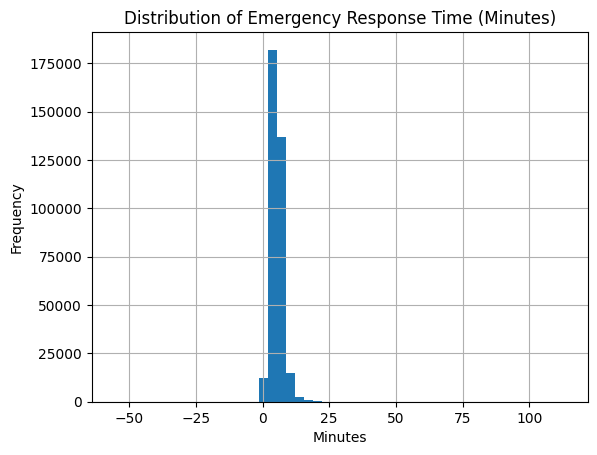

In [10]:
df["response_time_minutes"].hist(bins=50)
plt.title("Distribution of Emergency Response Time (Minutes)")
plt.xlabel("Minutes")
plt.ylabel("Frequency")
plt.show()


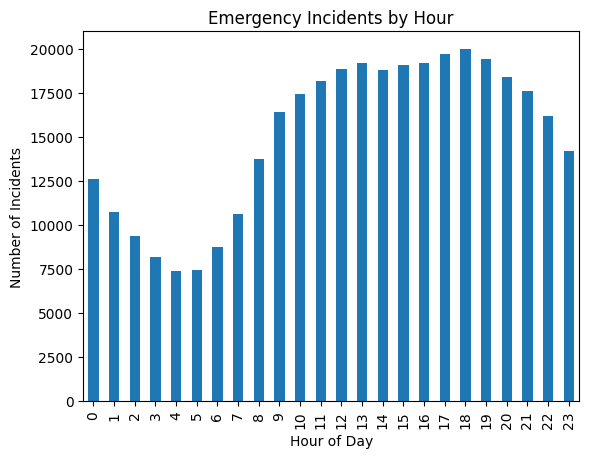

In [11]:
df["hour"].value_counts().sort_index().plot(kind="bar")
plt.title("Emergency Incidents by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Incidents")
plt.show()


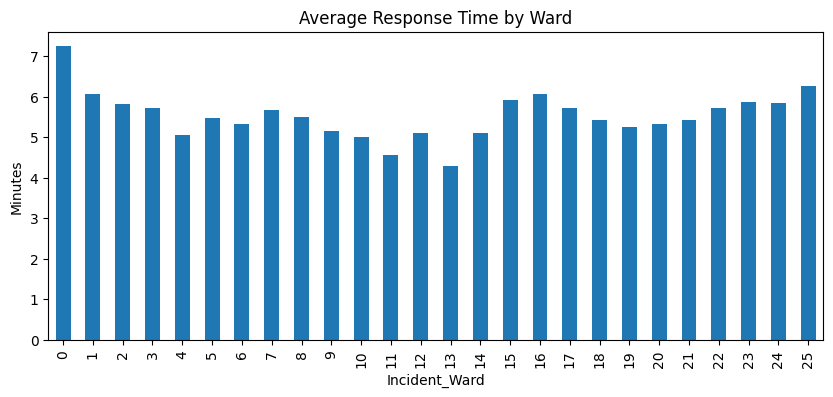

In [12]:
df.groupby("Incident_Ward")["response_time_minutes"].mean().plot(kind="bar", figsize=(10,4))
plt.title("Average Response Time by Ward")
plt.ylabel("Minutes")
plt.show()


In [13]:
df.to_csv("../data/processed/emergency_cleaned_final.csv", index=False)


SyntaxError: invalid syntax (339777499.py, line 1)